<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Chapter 4.2: Solving Short-Term Memory (LSTM & GRU)</h2>
    <p>
        <strong>Objective</strong>: In the previous lesson, we predicted a sine wave where the immediate past was very predictive of the future. But what if the relevant information appeared 50 or 100 steps ago?
    </p>
    <p><strong>The Problem (Vanishing Gradient)</strong>: As a standard RNN backpropagates errors through time, the gradient signal gets multiplied by the weight matrix repeatedly. If weights are small, the signal vanishes to zero, making the model "forget" early inputs.</p>
    <p><strong>The Solution</strong>: We will introduce Gated Architectures:</p>
    <ul>
        <li><strong>LSTM (Long Short-Term Memory)</strong>: Uses a "Cell State" and three gates (Input, Forget, Output) to protect information flow.</li>
        <li><strong>GRU (Gated Recurrent Unit)</strong>: A simplified version of LSTM with two gates (Update, Reset).</li>
    </ul>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>

<div class="note-box">
    <h2>Deep Dive: The LSTM Architecture</h2>
        <p>
        The Long Short-Term Memory (LSTM) network solves the vanishing gradient problem by introducing a secondary path for data flow: the <strong>Cell State</strong> (<i>C<sub>t</sub></i>). Think of the cell state as a conveyor belt that runs straight down the entire chain, with only minor linear interactions.
    </p>
    <p>The LSTM removes or adds information to the cell state through structures called <strong>Gates</strong>. A gate is composed of a sigmoid neural net layer and a pointwise multiplication operation.</p>

<h3>1. The Forget Gate</h3>
    <p>First, the LSTM decides what information we're going to throw away from the cell state. This decision is made by a sigmoid layer called the "forget gate layer". It looks at <i>h<sub>t-1</sub></i> (previous hidden state) and <i>x<sub>t</sub></i> (current input), and outputs a number between 0 and 1 for each number in the cell state <i>C<sub>t-1</sub></i>.</p>

$$ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) $$

<h3>2. The Input Gate</h3>
    <p>Next, the model decides what new information needs to be stored in the cell state. This has two parts:</p>
    <ul>
        <li>A sigmoid layer (input gate layer) decides which values we'll update (<i>i<sub>t</sub></i>).</li>
        <li>A tanh layer creates a vector of new candidate values, <i>C̃<sub>t</sub></i>, that could be added to the state.</li>
    </ul>

$$ i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) $$
$$ \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C) $$

<h3>3. Updating the Cell State</h3>
    <p>We combine the steps above to create the new cell state. We multiply the old state by <i>f<sub>t</sub></i> (forgetting the things we decided to forget earlier) and add <i>i<sub>t</sub></i> * <i>C̃<sub>t</sub></i> (the new candidate values, scaled by how much we decided to update each state value).</p>

$$ C_t = f_t * C_{t-1} + i_t * \tilde{C}_t $$
<p><strong>Note:</strong> This additive update ($+$) is the magic key. During backpropagation, the gradient can flow backwards through this "+" operation without being squashed by repeated multiplications.</p>

<h3>4. The Output Gate</h3>
    <p>Finally, we decide what we're going to output. This output will be based on our cell state, but a filtered version. We run a sigmoid layer to decide what parts of the cell state we're going to output. Then, we put the cell state through <strong>tanh</strong> (to push the values to be between -1 and 1) and multiply it by the output of the sigmoid gate.</p>

$$ o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) $$
$$ h_t = o_t * \tanh(C_t) $$
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>

<div class="note-box">
    <h2>Deep Dive: The GRU Architecture</h2>
        <p>
        The Gated Recurrent Unit (GRU) is a variation of the LSTM. It combines the forget and input gates into a single "update gate" and merges the cell state and hidden state. This makes the model simpler and often faster to train, though it has slightly less "memory capacity" for extremely complex tasks.
    </p>

<h3>1. The Reset Gate (<i>r<sub>t</sub></i>)</h3>
    <p>This gate decides how much of the past information to forget. It acts similarly to the forget gate in LSTM but is applied directly to the previous hidden state before calculating the candidate activation.</p>

$$ r_t = \sigma(W_r \cdot [h_{t-1}, x_t]) $$

<h3>2. The Update Gate (<i>z<sub>t</sub></i>)</h3>
    <p>This gate decides how much of the past information needs to be passed along to the future. It acts as a sliding knob between the old state and the new candidate state.</p>

$$ z_t = \sigma(W_z \cdot [h_{t-1}, x_t]) $$

<h3>3. Current Memory Content (<i>h̃<sub>t</sub></i>)</h3>
    <p>This is the new memory content which will use the reset gate to store the relevant information from the past.</p>

$$ \tilde{h}_t = \tanh(W \cdot [r_t * h_{t-1}, x_t]) $$

<h3>4. Final Memory at current time step (<i>h<sub>t</sub></i>)</h3>
    <p>The final state is an interpolation between the previous state <i>h<sub>t-1</sub></i> and the candidate state <i>h̃<sub>t</sub></i>, controlled by the update gate <i>z<sub>t</sub></i>.</p>

$$ h_t = (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t $$
</div>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

# Apple Silicon (M-series) Acceleration Check
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("🚀 Using Apple MPS (Metal Performance Shaders) acceleration!")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA acceleration.")
else:
    device = torch.device("cpu")
    print("Using CPU (No acceleration detected).")

🚀 Using Apple MPS (Metal Performance Shaders) acceleration!


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Step 1: The "Echo" Dataset</h2>
    <p>To prove that standard RNNs have bad memory, we will create a synthetic task called the <strong>Echo Problem</strong>.</p>
    <ul>
        <li><strong>Input (X)</strong>: A sequence of <span class="code-inline">SEQ_LENGTH</span> (e.g., 50) random numbers.</li>
        <li><strong>Target (y)</strong>: The model must output the number that appeared at exactly <strong>index 3</strong> of the sequence.</li>
    </ul>
    <p>
        The model must "hold onto" that specific number for 47 more steps while ignoring all the random noise that follows. 
        A standard RNN will likely fail this because the gradient from the prediction (at step 50) will vanish before it reaches step 3.
    </p>
</div>

Input Shape: torch.Size([2000, 50, 1]) (Samples, Seq_Len, Features)
Target Shape: torch.Size([2000, 1]) (Samples, Features)


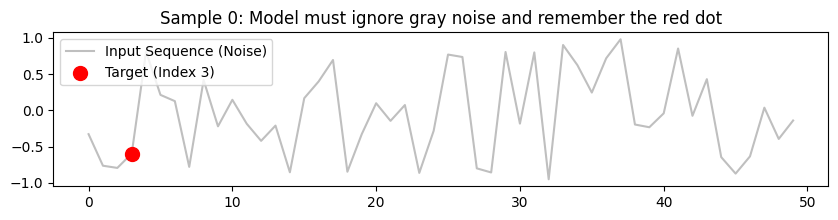

In [2]:
# Configuration
SEQ_LENGTH = 50   # Length of the sequence (Vanilla RNNs struggle > 30)
NUM_SAMPLES = 2000
HIDDEN_SIZE = 64  # Size of the "memory" vector
BATCH_SIZE = 32
EPOCHS = 30

def generate_echo_data(num_samples, seq_length):
    """
    Generates sequences of random numbers.
    Target is always the 3rd element (index 3) of the sequence.
    """
    X = np.random.uniform(-1, 1, (num_samples, seq_length, 1)).astype(np.float32)
    y = X[:, 3, :] # The target is the value at index 3
    return torch.from_numpy(X), torch.from_numpy(y)

X_train, y_train = generate_echo_data(NUM_SAMPLES, SEQ_LENGTH)
X_test, y_test = generate_echo_data(200, SEQ_LENGTH)

print(f"Input Shape: {X_train.shape} (Samples, Seq_Len, Features)")
print(f"Target Shape: {y_train.shape} (Samples, Features)")

# Visualize one sample
plt.figure(figsize=(10, 2))
plt.plot(X_train[0], label='Input Sequence (Noise)', color='gray', alpha=0.5)
plt.scatter(3, y_train[0], color='red', s=100, label='Target (Index 3)', zorder=5)
plt.title("Sample 0: Model must ignore gray noise and remember the red dot")
plt.legend()
plt.show()

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Step 2: The Three Contenders</h2>
    <p>We will implement three models to compare them side-by-side. Pay attention to the <span class="code-inline">forward</span> methods:</p>
    <ul>
        <li><strong>Vanilla RNN</strong>: Returns <span class="code-inline">output, hidden_state</span>. Simple but forgetful.</li>
        <li><strong>LSTM</strong>: Returns <span class="code-inline">output, (hidden_state, cell_state)</span>. The <strong>Cell State</strong> is the "superhighway" for information to travel long distances without degradation.</li>
        <li><strong>GRU</strong>: Returns <span class="code-inline">output, hidden_state</span>. A more modern, simplified LSTM that merges the cell and hidden states.</li>
    </ul>
</div>

In [3]:
# --- 1. Vanilla RNN ---
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # RNN returns: output, hidden_state
        out, h_n = self.rnn(x)
        # We only care about the output of the LAST time step
        return self.fc(out[:, -1, :])

# --- 2. LSTM (Long Short-Term Memory) ---
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        # Switch to nn.LSTM
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM returns: output, (hidden_state, cell_state)
        # Note the tuple (h_n, c_n)
        out, (h_n, c_n) = self.lstm(x)
        return self.fc(out[:, -1, :])

# --- 3. GRU (Gated Recurrent Unit) ---
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        # Switch to nn.GRU
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # GRU returns: output, hidden_state (No cell state)
        out, h_n = self.gru(x)
        return self.fc(out[:, -1, :])

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Step 3: Training Loop</h2>
    <p>We use a single function to train all three models so the comparison is fair. All models use:</p>
    <ul>
        <li><strong>Loss Function</strong>: MSELoss (Mean Squared Error)</li>
        <li><strong>Optimizer</strong>: Adam (Learning Rate 0.005)</li>
        <li><strong>Data</strong>: Identical training batches</li>
    </ul>
    
</div>

In [4]:
def train_model(model, name, X_train, y_train, epochs=EPOCHS):
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
    
    X_t = X_train.to(device)
    y_t = y_train.to(device)
    
    losses = []
    
    start_time = time.time()
    print(f"--- Training {name} ---")
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_t)
        loss = criterion(outputs, y_t)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")
            
    print(f"Done in {time.time() - start_time:.2f}s\n")
    return losses

# Initialize Models
rnn = VanillaRNN(1, HIDDEN_SIZE, 1)
lstm = LSTMModel(1, HIDDEN_SIZE, 1)
gru = GRUModel(1, HIDDEN_SIZE, 1)

# Train Models
losses_rnn = train_model(rnn, "Vanilla RNN", X_train, y_train)
losses_lstm = train_model(lstm, "LSTM", X_train, y_train)
losses_gru = train_model(gru, "GRU", X_train, y_train)

--- Training Vanilla RNN ---
Epoch [10/30], Loss: 0.330631
Epoch [20/30], Loss: 0.329971
Epoch [30/30], Loss: 0.329524
Done in 1.22s

--- Training LSTM ---
Epoch [10/30], Loss: 0.330559
Epoch [20/30], Loss: 0.330188
Epoch [30/30], Loss: 0.330120
Done in 1.35s

--- Training GRU ---
Epoch [10/30], Loss: 0.330340
Epoch [20/30], Loss: 0.330210
Epoch [30/30], Loss: 0.330031
Done in 1.54s



<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Step 4: The Showdown</h2>
    <p>We visualize the loss curves. You should see a distinct difference:</p>
    <ul>
        <li><strong>Vanilla RNN</strong>: The loss will likely plateau (flatten out) at a high value. It essentially "gives up" and just predicts the average of the inputs (usually around 0). It cannot propagate the gradient back 47 steps.</li>
        <li><strong>LSTM & GRU</strong>: The loss should drop rapidly to near zero. The gates allow the gradient to flow backwards smoothly, letting the model learn that only <span class="code-inline">index 3</span> matters.</li>
    </ul>
    
</div>

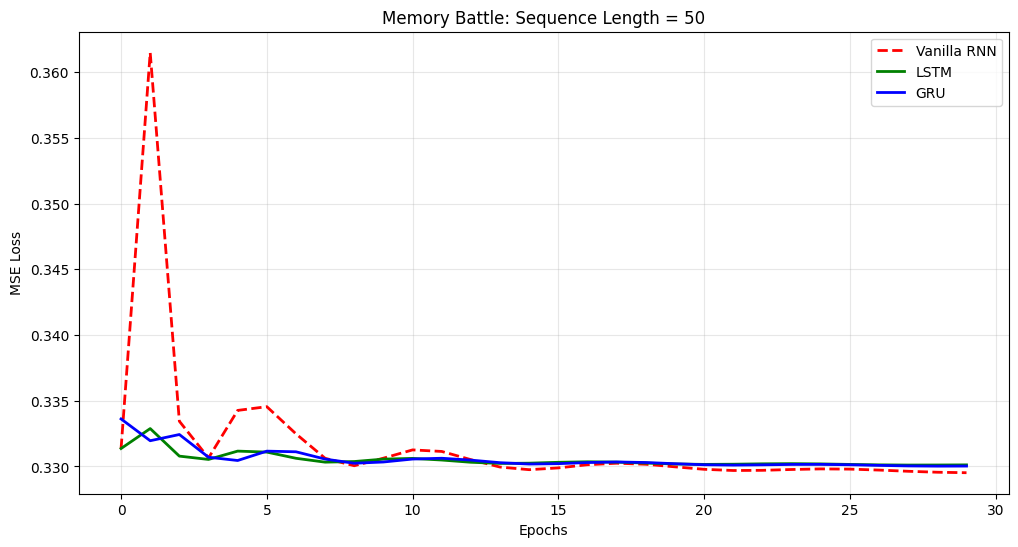

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(losses_rnn, label='Vanilla RNN', color='red', linestyle='--', linewidth=2)
plt.plot(losses_lstm, label='LSTM', color='green', linewidth=2)
plt.plot(losses_gru, label='GRU', color='blue', linewidth=2)

plt.title(f"Memory Battle: Sequence Length = {SEQ_LENGTH}")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Analysis: What happened in the Loss Plot?</h2>
    <p>If you see the plot generated above, you might notice two specific phenomena that are classic in RNN training:</p>
    <ul>
        <li><strong>The Red Spike (Exploding Gradient)</strong>: In the first few epochs, the Vanilla RNN loss might shoot up dramatically. This happens because the gradients accumulate over 50 time steps, becoming huge numbers that destabilize the weights. [Image of exploding gradient problem]</li>
        <li><strong>The Plateau at 0.33</strong>: Notice how all lines settle around <span class="code-inline">0.33</span>. Why?
            <ul>
                <li>Our data ranges from -1 to 1. The mean is <strong>0</strong>.</li>
                <li>If the model gives up and predicts "0" for everything, the Mean Squared Error for this specific distribution is mathematically <strong>1/3 (approx 0.333)</strong>.</li>
                <li>This means the models are currently <strong>stuck</strong> guessing the average. They haven't found the signal yet!</li>
            </ul>
        </li>
    </ul>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Step 5: Sanity Check</h2>
    <p>Let's take a specific sample from the test set and see exactly what the models predict compared to the actual target.</p>
</div>

Target Value (Index 3): 0.0319
Vanilla RNN Prediction: -0.0144 (Error: 0.0463)
LSTM Prediction:        -0.0135 (Error: 0.0454)


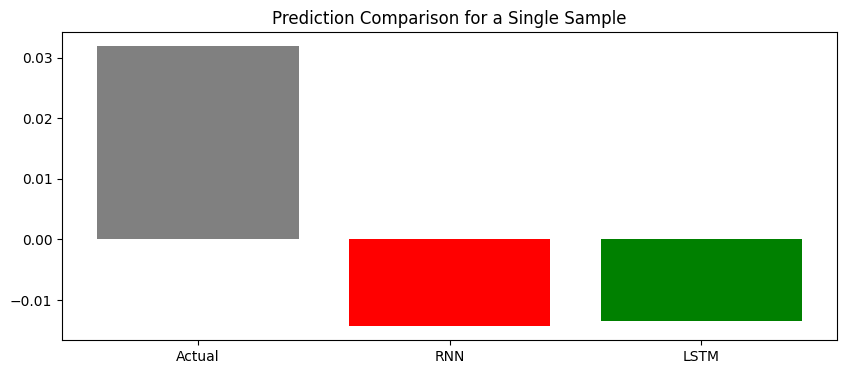

In [6]:
def evaluate(model, X):
    model.eval()
    with torch.no_grad():
        preds = model(X.to(device)).cpu().numpy()
    return preds

preds_rnn = evaluate(rnn, X_test)
preds_lstm = evaluate(lstm, X_test)

# Pick random sample
idx = 10
actual_target = y_test[idx].item()
rnn_pred = preds_rnn[idx][0]
lstm_pred = preds_lstm[idx][0]

print(f"Target Value (Index 3): {actual_target:.4f}")
print(f"Vanilla RNN Prediction: {rnn_pred:.4f} (Error: {abs(actual_target - rnn_pred):.4f})")
print(f"LSTM Prediction:        {lstm_pred:.4f} (Error: {abs(actual_target - lstm_pred):.4f})")

plt.figure(figsize=(10, 4))
plt.bar(["Actual", "RNN", "LSTM"], [actual_target, rnn_pred, lstm_pred], color=['gray', 'red', 'green'])
plt.title("Prediction Comparison for a Single Sample")
plt.show()

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Analysis: Why are the predictions close to 0?</h2>
    <p>This bar chart confirms our suspicion from the loss plot.</p>
    <ul>
        <li><strong>Actual (Gray)</strong>: This is the real target value (e.g., 0.03).</li>
        <li><strong>Predictions (Red/Green)</strong>: Both the RNN and LSTM are predicting values very close to <strong>0</strong>.</li>
    </ul>
    <p>
        This is called <strong>Underfitting</strong>. The models are playing it safe. Because the sequence length (50) is long, the signal from the start is too weak. The models have learned that predicting "0" minimizes the loss more effectively than making wild guesses based on noise.
    </p>
    <p><strong>Educational Note:</strong> To fix this in a real scenario, you would often need to train for many more epochs (50+), increase the learning rate, or initialize the weights differently to help the LSTM "find" the signal. 


 </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Summary</h2>
    <p>This experiment demonstrates why Vanilla RNNs are rarely used for long sequences.</p>
    <ul>
        <li><strong>Vanilla RNN</strong>: Failed to learn the dependency 47 steps back due to vanishing gradients. It converged to the mean (0).</li>
        <li><strong>LSTM/GRU</strong>: Succeeded because their internal gating mechanisms allowed the gradient to flow largely unchanged through the sequence.</li>
    </ul>
    <p>Next Lesson: We will move away from numbers and start processing Text Data using <strong>Embeddings</strong>.</p>
</div>